## Objetivos
1. Explorar las características principales del conjunto de datos.
2. Identificar patrones y correlaciones entre variables clave.
3. Limpiar los datos para su análisis.
4. Presentar hallazgos que expliquen factores que influyen en los precios.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
DATOSCRUDOS = pd.read_csv("housing.csv")
DATOSCRUDOSCOPY = DATOSCRUDOS.copy()
print(DATOSCRUDOSCOPY.info())
print(DATOSCRUDOSCOPY.describe())
print(DATOSCRUDOSCOPY.isnull().sum())
data_cleaned = DATOSCRUDOSCOPY.dropna()
print(data_cleaned.isnull().sum())

ModuleNotFoundError: No module named 'matplotlib'

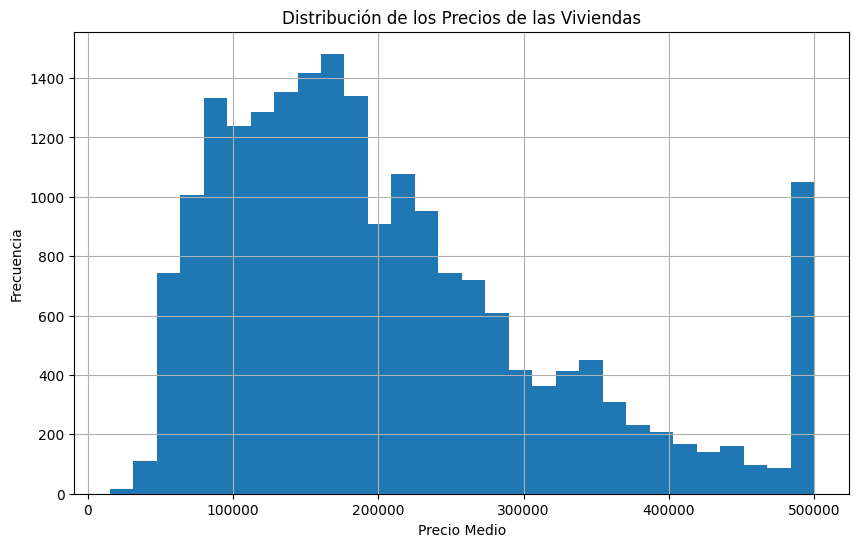

In [5]:
# Histograma de precios
data_cleaned['median_house_value'].hist(bins=30, figsize=(10, 6))
plt.title("Distribución de los Precios de las Viviendas")
plt.xlabel("Precio Medio")
plt.ylabel("Frecuencia")
plt.show()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


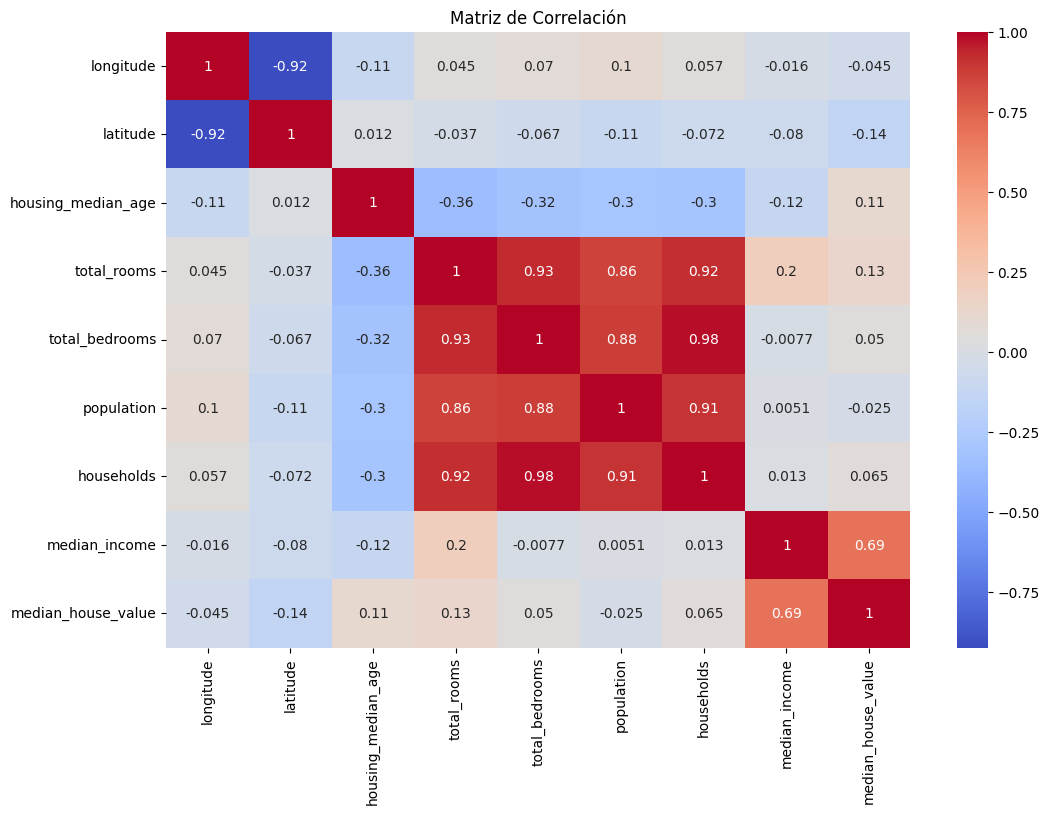

In [6]:
# Filtrar solo columnas numéricas
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Comprobar las columnas numéricas seleccionadas
print(numeric_data.columns)

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [7]:
proximidad_ocenano_hogares = DATOSCRUDOSCOPY.groupby(by="ocean_proximity")['households'].sum().reset_index(name='num_hogares')
print(proximidad_ocenano_hogares)

  ocean_proximity  num_hogares
0       <1H OCEAN    4730118.0
1          INLAND    3127759.0
2          ISLAND       1383.0
3        NEAR BAY    1118931.0
4      NEAR OCEAN    1332308.0


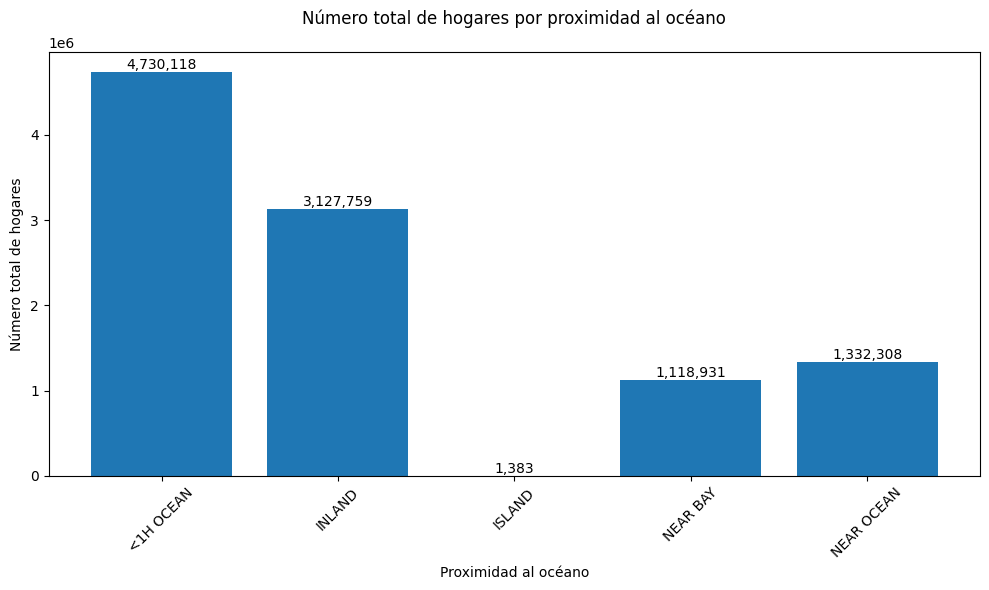

In [8]:
## Trabajaremos con el DataFrame Copia
## Podemos ver numeros de registro de hogares
plt.figure(figsize=(10, 6))
bars = plt.bar(proximidad_ocenano_hogares['ocean_proximity'], proximidad_ocenano_hogares['num_hogares'])
plt.title('Número total de hogares por proximidad al océano', pad=20)
plt.xlabel('Proximidad al océano')
plt.ylabel('Número total de hogares')
plt.xticks(rotation=45)

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Ajustar diseño
plt.tight_layout()
plt.show()

En el grafico podemos observar que el número de hogares en la cuidad de California, aumenta a medida que esta mas lejos de la costa/oceano

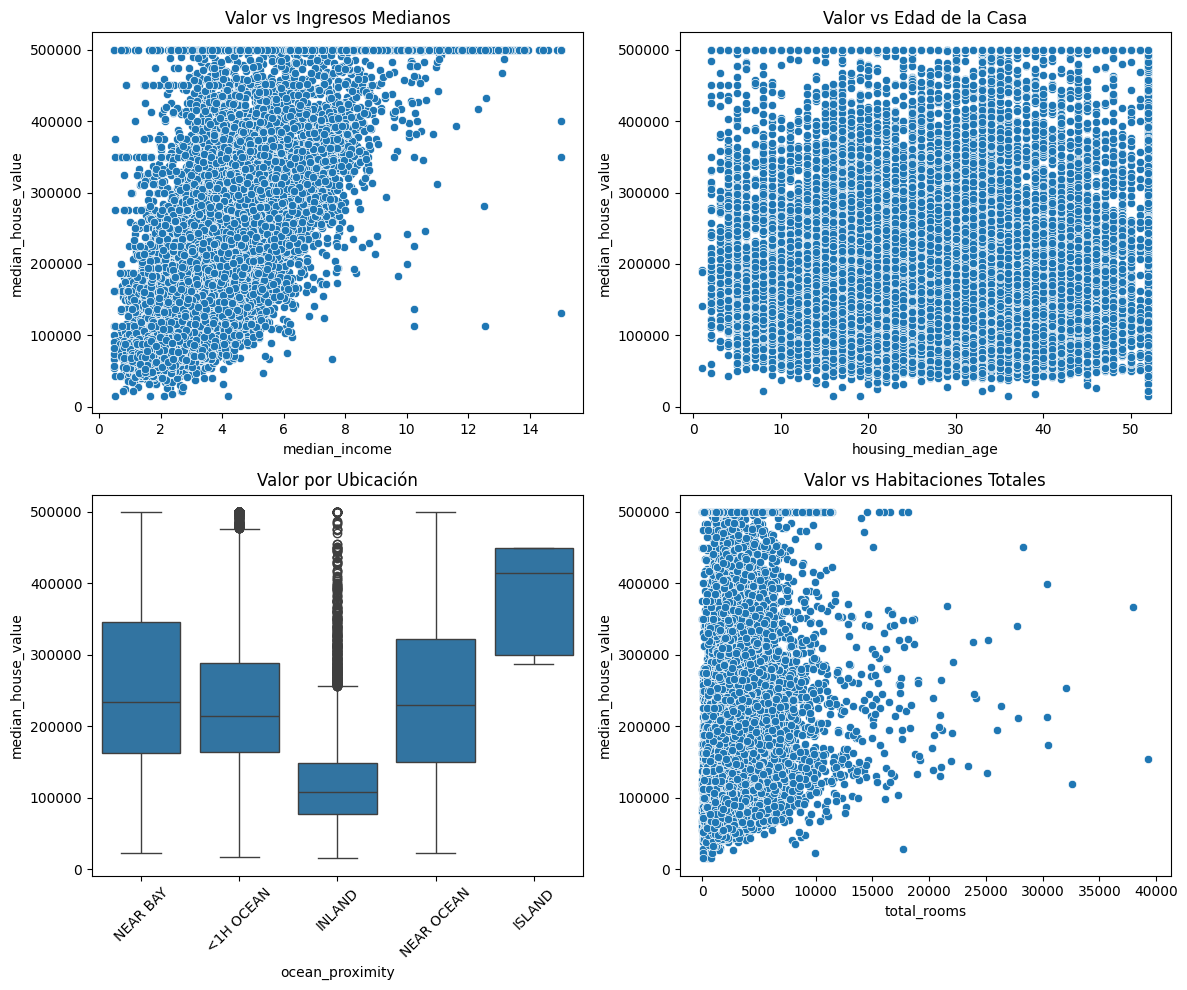

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Valor vs Ingresos
sns.scatterplot(data=DATOSCRUDOSCOPY, x='median_income', y='median_house_value', ax=axes[0,0])
axes[0,0].set_title('Valor vs Ingresos Medianos')

# Gráfico 2: Valor vs Edad
sns.scatterplot(data=DATOSCRUDOSCOPY, x='housing_median_age', y='median_house_value', ax=axes[0,1])
axes[0,1].set_title('Valor vs Edad de la Casa')

# Gráfico 3: Valor por ubicación
sns.boxplot(data=DATOSCRUDOSCOPY, x='ocean_proximity', y='median_house_value', ax=axes[1,0])
axes[1,0].set_title('Valor por Ubicación')
axes[1,0].tick_params(axis='x', rotation=45)

# Gráfico 4: Valor vs Habitaciones
sns.scatterplot(data=DATOSCRUDOSCOPY, x='total_rooms', y='median_house_value', ax=axes[1,1])
axes[1,1].set_title('Valor vs Habitaciones Totales')

plt.tight_layout()
plt.show()

## Que entiendo de los graficos?
Resumen del grafico nro 1: En el se puede observar que el valor de la media de los hogares en california es proporcional a la media de los ingresos.

Resumen grafico nro 2: En el se observa que el valor de las casa varia mucho de acuerdo a la edad de la misma, aqui cabe resaltar que dichos valores no se pueden asumir como concretos, ya que dependen de otros factores.

Resumen grafico nro 3: En el se aprecia que la media de los valores de los hogares se concentra de acuerdo a la zona en la cual se ubiquen. lo cual llama mucho la atencion como los promedios mas solidos son las ISLAS y LA BAHIA.

Resumen grafico nro 4: Es mas para una visualizacion, lo que no unfluye en el valor final de los hogares, ya que su relevancia es superficial como pudimos observar en los graficos anteriores.


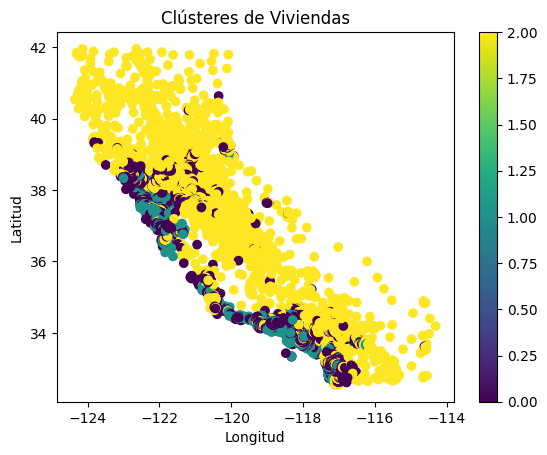

In [10]:
## Análisis de Clústeres
from sklearn.cluster import KMeans

# Seleccionar variables relevantes
features = numeric_data[["latitude", "longitude", "median_house_value"]]

# Realizar clustering
kmeans = KMeans(n_clusters=3, random_state=42)
numeric_data["cluster"] = kmeans.fit_predict(features)

# Visualizar los clústeres
plt.scatter(numeric_data["longitude"], numeric_data["latitude"], c=numeric_data["cluster"], cmap="viridis")
plt.title("Clústeres de Viviendas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.colorbar()
plt.show()


## Que nos proporciona el Análisis de Clústeres

Con el lo que conseguimos es agrupar los conjuntos de datos con caracteristicas similares, asi como son la localizacion, y la media de valor de las mismas.

Asi mismo se observa en el grafico proporcionado.

La conclusión que podemos obtener de ella es que el mayor costo de las casas se ubica a menor distancia de la "Bahia" o la "Isla". Se llaga a la conclusión median la apreciacion de colores.

Tambien cabe resaltar que en zonas de alto valor se encuentran propiedades con bajo costo.